# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [4]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value."
d3 = "Give me liberty. of give me death"

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.14285714285714285
0.125


In [5]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0],tfidf[1]))
print(cosine_similarity(tfidf[0],tfidf[2]))
print(cosine_similarity(tfidf[1],tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 한국어 형태소 분석기 설치

In [6]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 26.0 MB/s 
     |████████████████████████████████| 448 kB 40.0 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [8]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.0 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu 

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [9]:
import urllib.request
raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [10]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [11]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [12]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as font_manager
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [13]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [14]:
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('마음', 0.9684715270996094),
 ('작품', 0.9637728929519653),
 ('듯', 0.9631922245025635),
 ('따뜻', 0.9600968956947327),
 ('잔잔', 0.9577287435531616),
 ('표현', 0.9542999267578125),
 ('가슴', 0.9540854096412659),
 ('느낌', 0.9536675810813904),
 ('모습', 0.9531862139701843),
 ('이야기', 0.9531140327453613)]

* t-sne을 이용한 단어 벡터 시각화

In [15]:
tsne = TSNE(n_components=2)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [16]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 2.6587185e-01, -3.1505939e-02, -2.9159507e-01, ...,
         8.3090672e-03, -3.0334723e-01, -1.3957517e-01],
       [ 5.7787293e-01, -4.1088268e-01, -4.9204317e-01, ...,
        -1.3334308e-03, -8.6372155e-01, -2.5665924e-01],
       [ 3.3499685e-01, -3.3147104e-02, -3.0226052e-01, ...,
        -1.6421051e-01, -8.4243095e-01, -9.8373510e-02],
       ...,
       [ 3.8022976e-02, -3.4451182e-03, -3.8024258e-02, ...,
         6.4430037e-03, -5.6454465e-02, -1.9334892e-02],
       [ 2.8807711e-02, -1.1204614e-02, -8.8388417e-03, ...,
         9.6470779e-03, -6.9150165e-02, -2.9187856e-02],
       [ 3.1915646e-02, -4.0305527e-03, -2.5435820e-02, ...,
         6.2708015e-04, -5.5873226e-02, -1.7851971e-02]], dtype=float32)

In [17]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])
df[0:10]

,x,y
어릴,-24.449787,-16.092859
때,-52.718235,21.630962
보,-58.066429,24.525064
고,-56.610466,24.215786
지금,-56.972515,21.309465
다시,-57.529938,23.182192
봐도,-62.139297,13.053505
재밌,-67.376648,11.782219
어요,-66.658432,10.976874
ㅋㅋ,-67.618103,9.007857


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


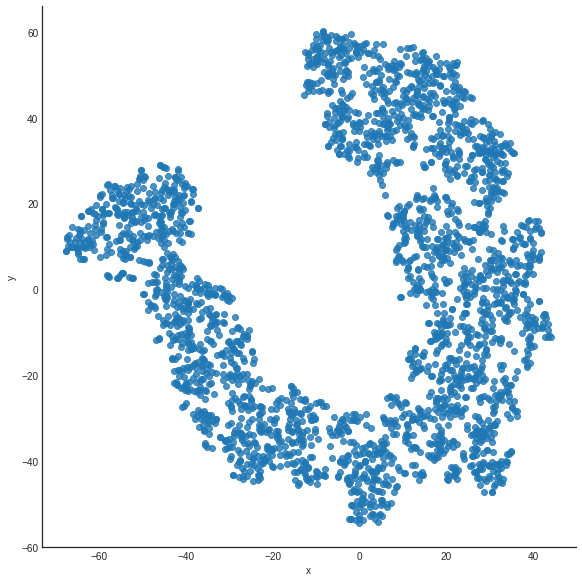

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [19]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([2, 3, 3, ..., 0, 0, 0])

In [20]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-24.449787,-16.092859,2
때,-52.718235,21.630962,3
보,-58.066429,24.525064,3
고,-56.610466,24.215786,3
지금,-56.972515,21.309465,3
다시,-57.529938,23.182192,3
봐도,-62.139297,13.053505,3
재밌,-67.376648,11.782219,3
어요,-66.658432,10.976874,3
ㅋㅋ,-67.618103,9.007857,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

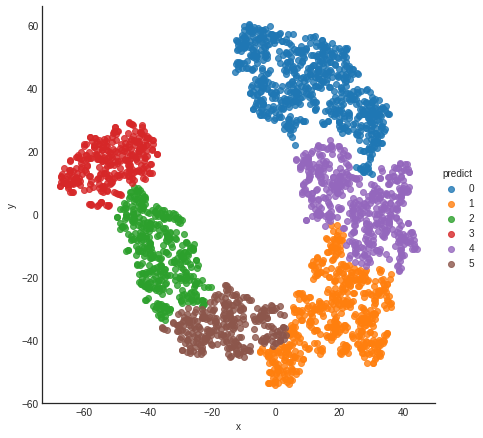

In [22]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show

#### average

In [23]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([2, 5, 5, ..., 0, 0, 0])

In [24]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-24.449787,-16.092859,2
때,-52.718235,21.630962,5
보,-58.066429,24.525064,5
고,-56.610466,24.215786,5
지금,-56.972515,21.309465,5
다시,-57.529938,23.182192,5
봐도,-62.139297,13.053505,5
재밌,-67.376648,11.782219,5
어요,-66.658432,10.976874,5
ㅋㅋ,-67.618103,9.007857,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


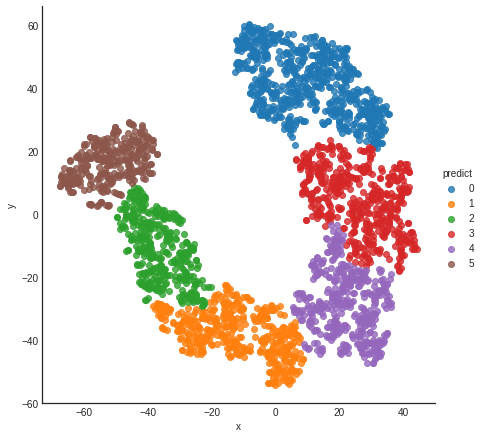

In [25]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')

#### complete

In [26]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([4, 2, 2, ..., 3, 3, 3])

In [27]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-24.449787,-16.092859,4
때,-52.718235,21.630962,2
보,-58.066429,24.525064,2
고,-56.610466,24.215786,2
지금,-56.972515,21.309465,2
다시,-57.529938,23.182192,2
봐도,-62.139297,13.053505,2
재밌,-67.376648,11.782219,2
어요,-66.658432,10.976874,2
ㅋㅋ,-67.618103,9.007857,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


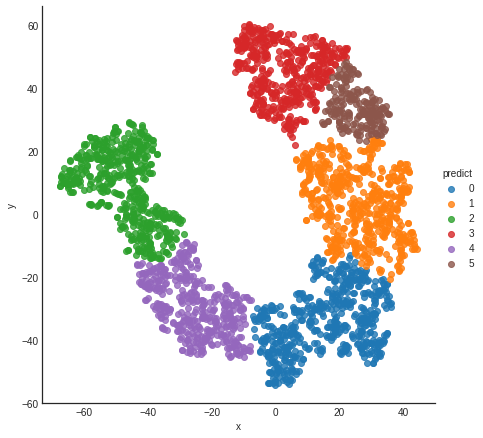

In [28]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [30]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,47.182538,52.762623,51.605195,49.605057,51.388968,47.686578,51.222411,50.183067,49.975489,46.040792,39.182740,46.033086,56.951977,41.848731,40.954366,77.123331,39.403963,43.345640,43.843604,42.944526,79.977590,44.597913,53.325731,49.550780,44.459822,27.102848,49.633418,51.357766,23.736754,41.753661,31.248279,41.297779,49.449426,56.808392,34.621918,41.266420,44.466854,39.250288,24.605731,...,58.883374,72.633020,48.947666,72.412183,55.790777,66.034549,53.118006,48.238896,60.586178,73.532610,56.981476,58.441511,58.368933,70.168045,66.258620,70.481316,75.495966,76.057857,61.508121,54.425727,75.742204,71.114732,52.589717,31.632267,70.865261,58.153806,69.359240,56.662231,52.494213,67.968548,48.000009,76.949067,43.781653,77.333495,71.352248,64.801854,58.908403,68.736816,77.757634,74.432162
1,47.182538,0.000000,6.081037,4.672342,4.266411,5.055571,12.740847,17.659751,17.545332,19.528155,11.188214,14.005115,11.125971,99.418269,11.070246,14.233783,86.300433,13.929666,12.701870,12.777762,8.593014,74.607305,91.504524,98.157193,5.771287,10.229266,71.120686,15.832043,10.463945,26.633863,10.092419,16.294171,12.122903,5.975552,78.610337,12.576132,12.286060,5.174879,8.803648,69.123896,...,48.871627,84.935521,63.080987,71.299661,50.003419,56.558470,73.798233,64.593154,86.575076,57.074005,75.723698,58.214912,54.741552,51.955106,79.256188,57.729368,69.963522,65.726826,53.125426,57.411719,65.907689,52.870358,57.780262,78.421967,82.376083,72.559825,51.760716,48.403900,73.723046,68.646502,67.126046,61.883717,78.588385,73.214607,81.750730,48.031544,57.778417,54.067361,61.726042,57.308076
2,52.762623,6.081037,0.000000,1.488449,3.396576,1.446074,12.173123,15.781644,16.042941,18.221366,15.647261,19.744463,15.590120,105.466777,16.604771,19.688599,91.161014,19.643762,17.788532,17.746088,14.155322,78.348200,96.961074,104.111497,8.645811,15.216065,76.044824,14.444261,7.771988,31.301969,15.743504,21.595219,17.670306,4.738324,84.319017,18.283344,17.825812,8.621475,13.648143,74.133345,...,52.917310,90.037823,68.624134,75.548281,54.452283,60.349887,79.504316,70.220695,92.396064,59.944067,81.320075,62.886199,59.217333,54.776023,84.475938,61.077626,73.794451,69.120603,57.172071,62.370250,69.356312,55.646871,62.891540,84.084572,87.456242,77.966854,54.681590,52.666679,79.453196,73.121222,72.841961,64.781710,84.654442,77.119577,86.761380,51.248259,62.383504,57.303598,64.494307,60.073445
3,51.605195,4.672342,1.488449,0.000000,2.928785,1.383382,12.456504,16.447014,16.620181,18.773630,14.240654,18.256035,14.182711,104.089240,15.118963,18.207757,89.758356,18.155332,16.329759,16.297018,12.667701,77.116310,95.856674,102.796785,7.328388,13.759336,75.116518,14.972965,8.482428,30.420276,14.255178,20.504736,16.184605,4.767878,82.832740,17.054646,16.340428,7.809877,12.639929,73.177267,...,51.625318,88.604604,67.146463,74.232214,53.099621,59.103006,78.018084,68.737880,90.907710,58.861003,79.839340,61.504558,57.862438,53.698548,83.029055,59.907715,72.545934,67.946334,55.882003,60.950802,68.172388,54.578422,61.454057,82.900930,86.025480,76.500463,53.585378,51.340894,77.966165,71.770113,71.355317,63.696246,83.202639,75.859578,85.339030,50.095442,61.010987,56.151548,63.433219,59.010220
4,49.605057,4.266411,3.396576,2.928785,0.000000,1.953925,9.739431,14.107247,14.162607,16.268316,15.270188,18.224891,15.208856,102.780122,15.333969,18.499019,90.546699,18.157407,16.941746,16.998330,12.858152,78.602098,93.726678,101.230670,8.984656,14.440454,72.686340,12.474238,6.429089,27.931011,14.345569,18.388207,16.384336,2.082465,82.790160,15.309269,16.547922,5.260967,10.388821,70.788350,...,52.941585,89.198406,67.313927,75.434582,54.175020,60.558949,77.980028,68.804312,90.69579

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

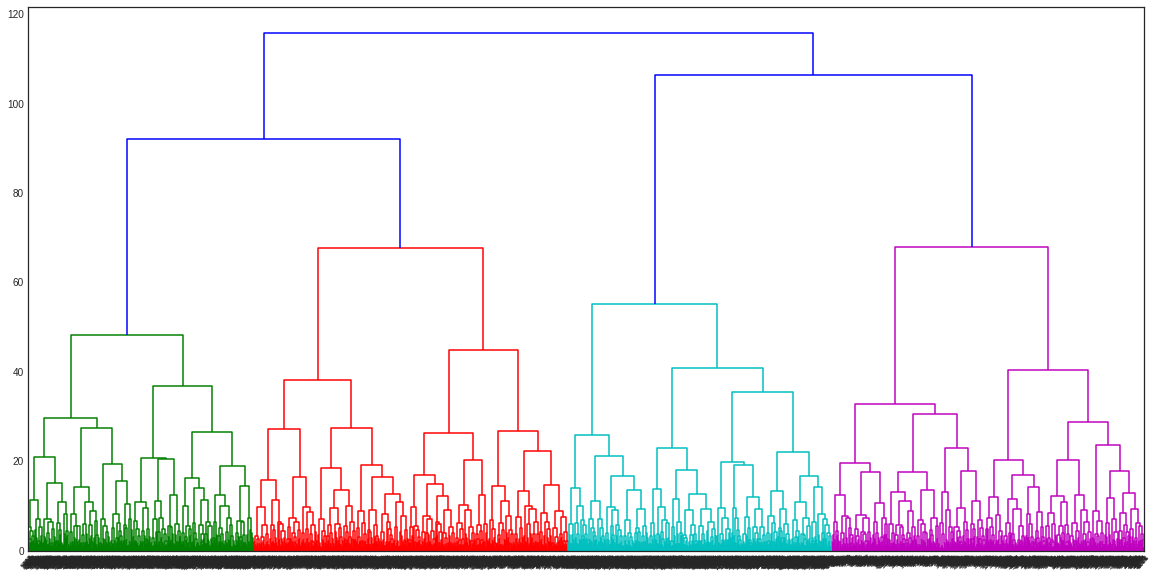

In [31]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

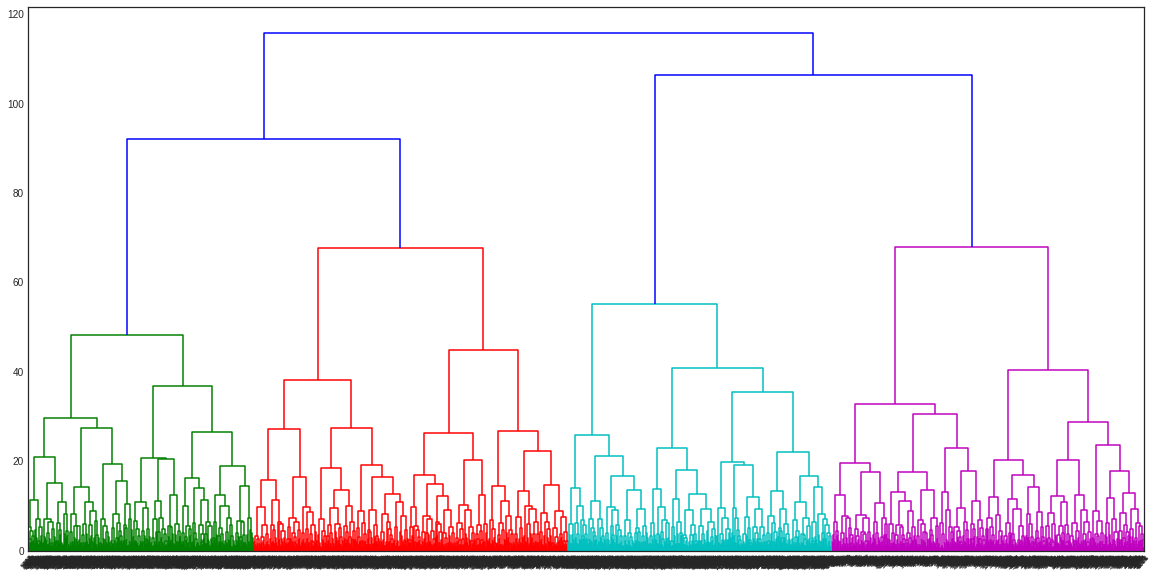

In [34]:
mergings = linkage(df, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(mergings,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [37]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-24.449787,-16.092859,2
때,-52.718235,21.630962,2
보,-58.066429,24.525064,2
고,-56.610466,24.215786,2
지금,-56.972515,21.309465,2
다시,-57.529938,23.182192,2
봐도,-62.139297,13.053505,2
재밌,-67.376648,11.782219,2
어요,-66.658432,10.976874,2
ㅋㅋ,-67.618103,9.007857,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


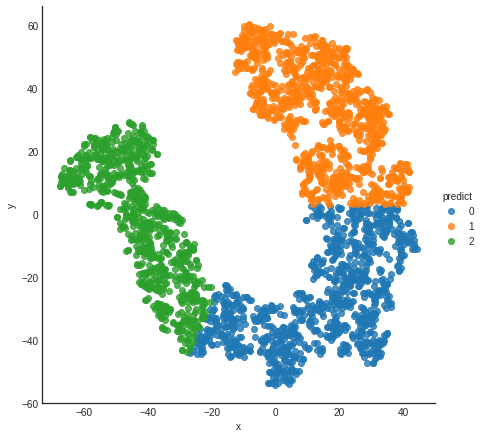

In [38]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### 클러스터 개수 6

In [39]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([5, 1, 1, ..., 2, 2, 2], dtype=int32)

In [40]:
results = df
results['predict']= predict
results[0:10]

,x,y,predict
어릴,-24.449787,-16.092859,5
때,-52.718235,21.630962,1
보,-58.066429,24.525064,1
고,-56.610466,24.215786,1
지금,-56.972515,21.309465,1
다시,-57.529938,23.182192,1
봐도,-62.139297,13.053505,1
재밌,-67.376648,11.782219,1
어요,-66.658432,10.976874,1
ㅋㅋ,-67.618103,9.007857,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


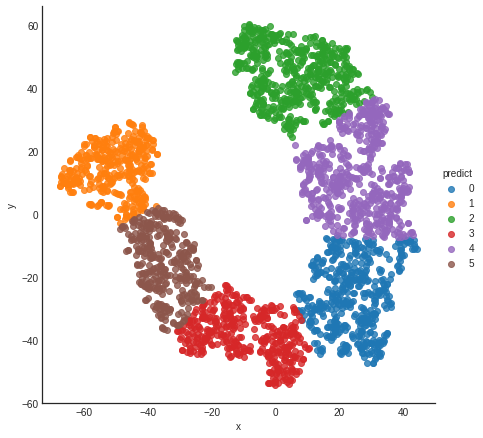

In [43]:
sns.lmplot('x', 'y', data=results, size=6, fit_reg=False, hue='predict')
plt.show()